In [84]:
import csv
import numpy as np

cpu_csv_file = "customer_system_cpu_utilization/APM00162430776.csv"

# Read all cpu data into memory
cpu_data = []
with open(cpu_csv_file) as csvfile:
    csv_reader = csv.reader(csvfile)
    cpu_header = next(csv_reader)
    for row in csv_reader:
        cpu_data.append(row)

# Pull out timestamp
timestamp = np.array([int(x[0])/1000 for x in cpu_data][::-1]) # [::-1], reverse a list
# Pull out SPA cpu stats
spa_cpu_stats = np.array([float(x[-2]) if x[-2] else 0.0 for x in cpu_data][::-1])
# Pull out SPB cpu stats
spb_cpu_stats = np.array([float(x[-1]) if x[-1] else 0.0 for x in cpu_data][::-1])

In [85]:
import datetime
timestamp_str = [datetime.datetime.fromtimestamp(t).strftime("%Y_%m_%d-%H:%M:%S") for t in timestamp]
# print timestamp
# print timestamp_str

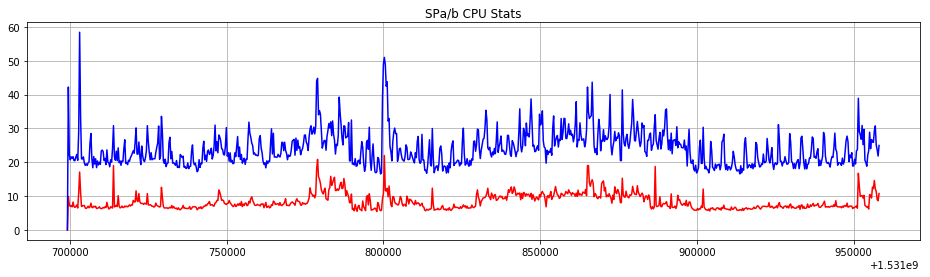

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,4))
plt.plot(timestamp, spa_cpu_stats, marker = '', color='r')
plt.plot(timestamp, spb_cpu_stats, marker = '', color='b')
plt.title('SPa/b CPU Stats')
plt.grid(which='both', axis='both')
plt.show()

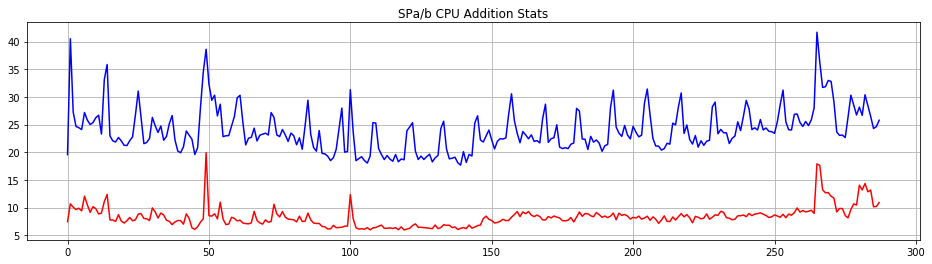

In [87]:
def calc_3_days_average_stats(cpu_stats):
    nr_per_day = (60/5)*24 # 5 min
    day1 = cpu_stats[:nr_per_day]
    day2 = cpu_stats[nr_per_day:nr_per_day+nr_per_day]
    day3 = cpu_stats[nr_per_day+nr_per_day:]
    return map(lambda x,y,z: (x+y+z)/3, day1, day2, day3)

spa_days = calc_3_days_average_stats(spa_cpu_stats)
spb_days = calc_3_days_average_stats(spb_cpu_stats)

plt.figure(figsize=(16,4))
plt.plot(spa_days, marker = '', color='r')
plt.plot(spb_days, marker = '', color='b')
plt.title('SPa/b CPU Addition Stats')
plt.grid(which='both', axis='both')
plt.show()

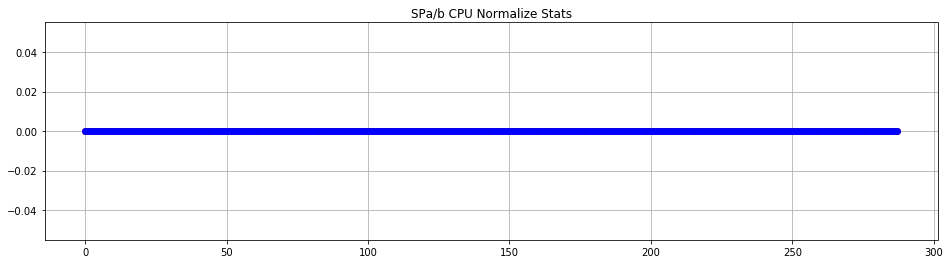

In [88]:
normalize_spa_days = [0 if p < 50 else 1 for p in spa_days]
normalize_spb_days = [0 if p < 50 else 1 for p in spb_days]

plt.figure(figsize=(16,4))
plt.plot(normalize_spa_days, marker = 'o', color='r')
plt.plot(normalize_spb_days, marker = 'o', color='b')
plt.title('SPa/b CPU Normalize Stats')
plt.grid(which='both', axis='both')
plt.show()

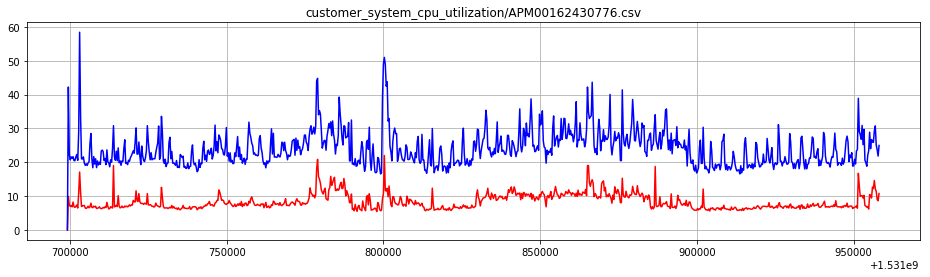

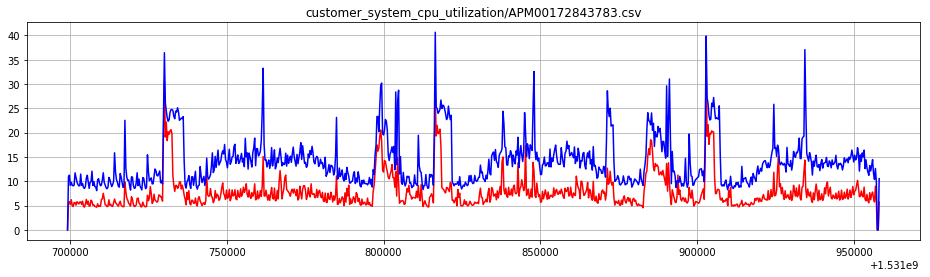

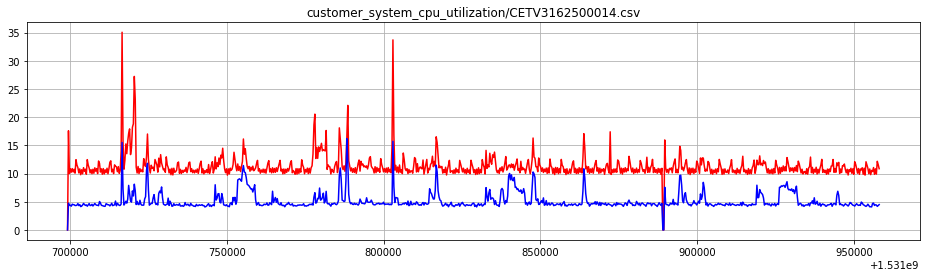

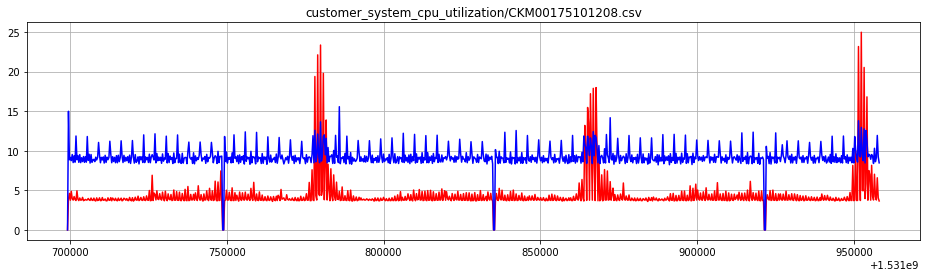

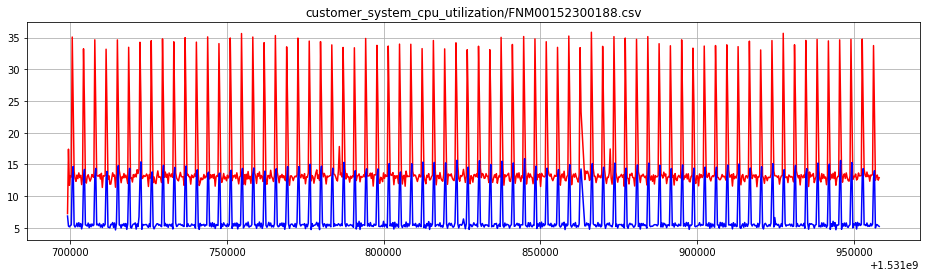

In [90]:
def draw_cpu_stats(csv_filename):
    cpu_data = []
    with open(csv_filename) as csvfile:
        csv_reader = csv.reader(csvfile)
        cpu_header = next(csv_reader)
        for row in csv_reader:
            cpu_data.append(row)
    timestamp = np.array([int(x[0])/1000 for x in cpu_data][::-1])
    spa_cpu_stats = np.array([float(x[-2]) if x[-2] else 0.0 for x in cpu_data][::-1])
    spb_cpu_stats = np.array([float(x[-1]) if x[-1] else 0.0 for x in cpu_data][::-1])

    plt.figure(figsize=(16,4))
    plt.plot(timestamp, spa_cpu_stats, marker = '', color='r')
    plt.plot(timestamp, spb_cpu_stats, marker = '', color='b')
    plt.title(csv_filename)
    plt.grid(which='both', axis='both')
    plt.show()
    
cpu_csv_files = ["customer_system_cpu_utilization/APM00162430776.csv",
                 "customer_system_cpu_utilization/APM00172843783.csv",
                 "customer_system_cpu_utilization/CETV3162500014.csv",
                 "customer_system_cpu_utilization/CKM00175101208.csv",
                 "customer_system_cpu_utilization/FNM00152300188.csv",
                ]
for f in cpu_csv_files:
    draw_cpu_stats(f)